Notebooks: 
[[1](IntroDS001.ipynb)]
[[2](IntroDS002.ipynb)]
[[3](IntroDS003.ipynb)]
[[4](IntroDS004.ipynb)]
[[5](IntroDS005.ipynb)]
[[6](IntroDS006.ipynb)]

Introduction to Data Science<br/>
[Oregon Curriculum Network](http://www.4dsolutions.net/ocn)

# On the Road with Data Science Tools

If you're able to install the litany of packages imported below, you're in good shape to do some real data science computing.  

You'll have access to probability curves galore (the pdfs, controlled by their parameters), and their corresponding cdfs.  You'll have ways to sample, and ways to go back and forth, from probability to zscore, from zscore to probability.

What's a zscore again?  That's not an idea from Python, but from statistics, and you might think of z for Zone.  If "mean" $\mu$ is the middle fence, then on either side, you're some distance from the fence, if not sitting right on it.  How far away from the fence are you?  We calibrate in Zones (z zones) with grid lines across the field every standard deviation away.

In [1]:
# Python Standard Library
import math
import sys

# 3rd party, might need to conda or pip install
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm, binom, poisson, zscore
import scipy
import seaborn as sns

print("matplotlib", matplotlib.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)
print("seaborn:", sns.__version__)
print("pandas:", pd.__version__)

matplotlib 3.1.3
numpy: 1.17.3
scipy: 1.4.1
seaborn: 0.10.0
pandas: 1.0.3


In [2]:
print("python itself:", sys.version)
sys.path.append("./python")  # local subfolder

python itself: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


What's [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) again?  That's a number you may compute.  Get the mean first...

$$
A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}
$$

then sum the 2nd powers (picture squares or triangles, many deltas) for all the differences, and divide by how many. Call that the variance, or "average of 2nd power differences".

$$
V = \sigma^{2}
$$

Now take the 2nd root of variance and you're done, you have the standard deviation at last.

$$
\sigma = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } }
$$

In [3]:
sample = np.random.choice(range(-4,4), size=100, replace=True)
x_bar = sample.sum()/len(sample)
x_var = ((sample - x_bar)**2).sum()/len(sample)
x_std = np.sqrt(x_var)

print("Spelled out...")
print("x_bar = ",x_bar)
print("x_var = ",x_var)
print("x_std = ",x_std)

print("Or let numpy do it...")
print("x_bar = ", sample.mean())
print("x_var = ", sample.var())
print("x_std = ", sample.std())

Spelled out...
x_bar =  -0.23
x_var =  5.2971
x_std =  2.301542960711357
Or let numpy do it...
x_bar =  -0.23
x_var =  5.2971
x_std =  2.301542960711357


## Pascal's Triangle

The rows of Pascal's Triangle each form a binomial distribution.  The elements of any row correspond to the coefficients of a polynomial of the form below.

$$
(x+y)^n = \sum_{k=0}^n {n \choose k} x^{n - k} y^k
$$

In other words, the coefficients correspond to:

$$
\binom{n}{k} = \frac{n!}{k!(n - k)!} 
$$


In [4]:
from statsfun import pascal

In [5]:
row  = 15
data = pascal(row)
data

[1,
 15,
 105,
 455,
 1365,
 3003,
 5005,
 6435,
 6435,
 5005,
 3003,
 1365,
 455,
 105,
 15,
 1]

In [6]:
%matplotlib inline

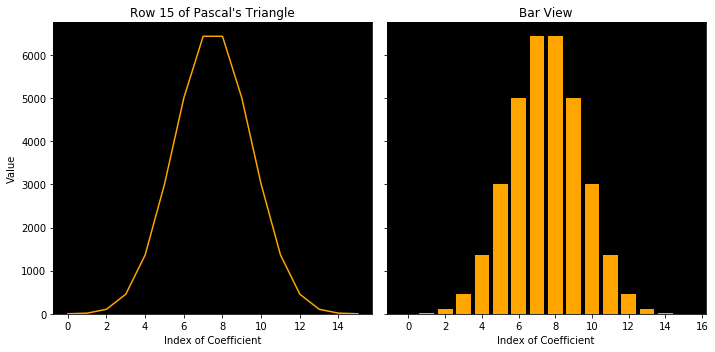

In [7]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('121')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Row {} of Pascal's Triangle".format(row))
ax1.set_xlabel('Index of Coefficient')
ax1.set_ylabel('Value')
plt.plot(data, color="orange")

ax2   = plt.subplot('122', sharey=ax1)  # I will explain
rect = ax2.patch  # a Rectangle instance
rect.set_facecolor('black')
plt.setp(ax2.get_yticklabels(), visible=False)

plt.title("Bar View".format(row))
ax2.set_xlabel('Index of Coefficient')
plt.bar(range(len(data)), data, color="orange");

fig.tight_layout()
plt.show();

## matplotlib

Before we continue with some more important distributions, both discrete and continuous, lets remark a bit on what just happened.  Two black and orange graphics appeared (unless this is a forked or branched version), and could have been saved to png or other format, including at high dpi, suitable for making into glossy posters.

Not a lot of coding went in to creating the above graphic, two side-by-side subplots.  Getting good results is relatively easy, from the point of view of grateful users of this capable API.  John D. Hunter (1968-2012) [gave Python the power of MATLAB](https://matplotlib.org/3.2.1/users/history.html) when it comes to making publication quality graphics.

A graphic that begins its life [in a Jupyter Notebook](logos2.ipynb) may be destined for publication within and entirely different document. The Notebook might be more like a lab notebook, for the individual technician.  That doesn't mean unshared necessarily, but it may mean not published.  

A Notebook is potentially like a scratch pad wherein works for the ages get developed, saved, and exhibited elsewhere.  

That's one workflow among many.

A Notebook might also be considered the finished work.  Or a work in progress.

While we're here, [lets mention seaborn](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html) as a good example of another layer.  Think of a wardrobe of custom clothes.  You're free to use old bits with new bits. Seaborn adds not just good cosmetics, but a host of new plots to our plotters' arcade.

A resource to check out next might be Edward Tufte's works on effective data visualization.  Now that you're gaining new powers, don't go overboard using "chart junk".  A clutter-free aesthetic helps keep your storyline going, just for starters.

Lets let Seaborn do its magic and then, uncharacteristically, revert back to matplotlib defaults, even after Seaborn has loaded.  This would not normally be a part of the workflow, yet here it makes sense.  Our task here is to explore what is doable.

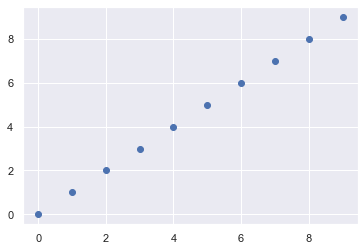

In [8]:
import seaborn as sns
sns.set()

f = plt.figure()
plt.plot(range(10), range(10), "o")
plt.show()
f.savefig("foo.png", bbox_inches='tight', dpi=600)

In [9]:
sns.reset_defaults()

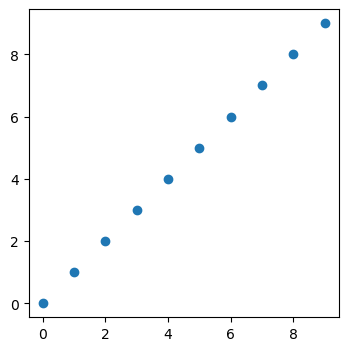

In [10]:
f = plt.figure(figsize=(4,4))
plt.plot(range(10), range(10), "o")
plt.show()
f.savefig("foo.png", bbox_inches='tight', dpi=600)

Yet with all this at our fingertips, there's yet so much more...

* [Altair](https://altair-viz.github.io/)
* [Bokeh](https://bokeh.org/)
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)

![penguin](https://media.giphy.com/media/SKab6E8Qeg7sY/giphy.gif)

## Binomial Distribution

Lets say an egg factory, staffed by chickens (unpaid, but fed) and various humans (presumably paid, perhaps in eggs), has a "bad egg" versus "good egg" classification based on various criteria.  An egg could be considered "bad" for a list of reasons, which we need not go into here.  Lets just say that the frequency of bad eggs is about 1 per 100 overall

Like most egg producers, our factory sells eggs by the dozen.  We call these egg cartons.  They have slots for eggs.  Each slot gets to be a 1 or 0 (True or False) depending on if it contains a bad egg or not.  The chance of each slot having a bad egg is not 1/12 or anything close to that high, it's 1/100.

Suppose we look at 10K egg cartons in our model (simulation), and wonder what percent of them, on average, will contain at least 1 bad egg (could be more).  Lets use the binomial distribution to simulate a machine that packs 12 eggs per carton.  This machine does not reject bad eggs.  Quality control has already occurred, which is how we got it down to 1 in 100 in the first place.

In [11]:
rng = np.random.default_rng(12345) # get a spanking new Random Number Generator and seed it

In [12]:
# 12 slots, chances of being bad egg, number of trials
sample = rng.binomial(12, 1/100, 10_000)
np.random.choice(sample, 100).reshape(10,10)  # lets look at 30 from the 100 on file -- 1s are rarer

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

More instructive might be a tally of what our binomial function has begotten.  Lets grap the Counter from collections and check it out:

In [13]:
from collections import Counter
tally_bad_cartons = Counter(sample)
tally_bad_cartons

Counter({0: 8928, 1: 1028, 2: 44})

OK, time to compute that average.  Of all 10K cartons, what percent have more than 0 bad eggs?

In [14]:
bad_carton_percent = 100 * sum(x > 0 for x in sample)/len(sample)
f"{bad_carton_percent}%"

'10.72%'

In [15]:
sum(binom(12, 1/100).pmf([1,2,3,4,5]))

0.11361512740636324

The biniomial distribution is a discrete (chopped up) version of the perfectly smooth Normal Distribution.  Instead of slots for 1s and 0s, our experiments may yield a continuous quantity such as volume, mass or density (mass/volume).

Lets to 10 coin tosses in a row, 10K times, and bin the results according to how many Heads we get (could be tails), from 0 to 10.  We'll make a histogram, which will bin our results into one of 11 buckets, standing for the 0 to 10 heads we might get.

In [16]:
# p=0.5 means fair coin, H or T equally likely
number_of_heads = rng.binomial(10, p=0.5, size=10_000) 

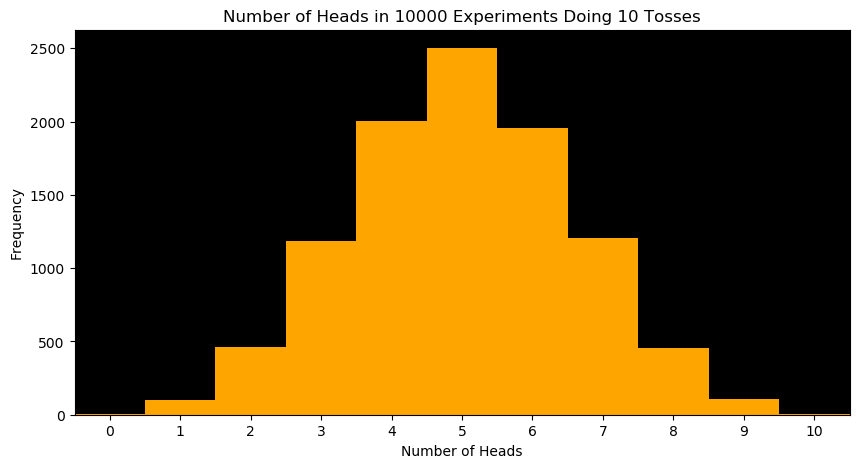

In [17]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('111')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Number of Heads in {} Experiments Doing {} Tosses".format(10_000,10))
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Frequency')
plt.xticks(range(0,11))
ax1.set_xlim(-0.5,10.5)

plt.hist(number_of_heads, bins=[x-0.5 for x in range(12)], color="orange");
plt.show();

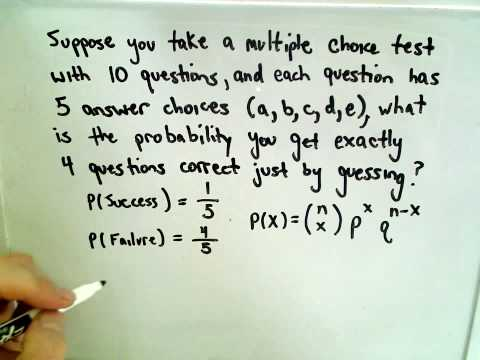

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('xNLQuuvE9ug')

In [19]:
dist = binom(10, 0.2) # 10 quiz questions, 0.2 chance of success if guessing
dist.pmf(4)           # chances of getting exactly 4 correct

0.08808038400000008

## Poisson Distribution

Before we get the Normal Distribution, which is continuous, lets look at another discrete distribution, [the Poisson distribution](https://youtu.be/8px7xuk_7OU).  Rather then success or failure, a binary outcome, a result of trials, we're interested in events, and their number within some time or space interval.

Poisson Distribution:

$$
P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}
$$

The Poisson distribution is the limit of the binomial distribution for large N.

In [20]:
rng = np.random.default_rng(938392)

In [21]:
s = rng.poisson(lam=10, size=1000)

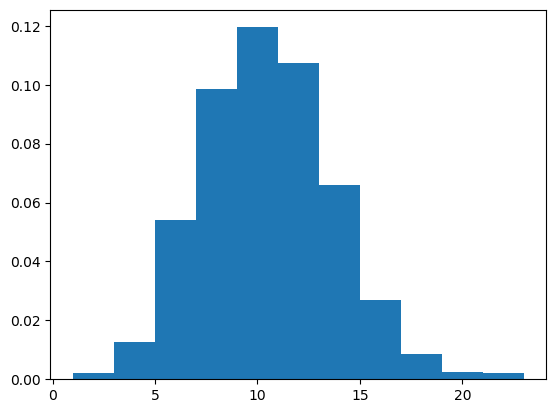

In [22]:
count, bins, ignored = plt.hist(s, 11, density=True);

In [23]:
(s.mean(), s.var(), s.std())

(10.011, 10.288879, 3.20762825152791)

Lets try the same thing in scipy.  See below.

In [24]:
s = poisson(mu=10).rvs(10_000) # scipy version
(s.mean(), s.var(), s.std())

(9.9678, 10.031763159999999, 3.167295875032833)

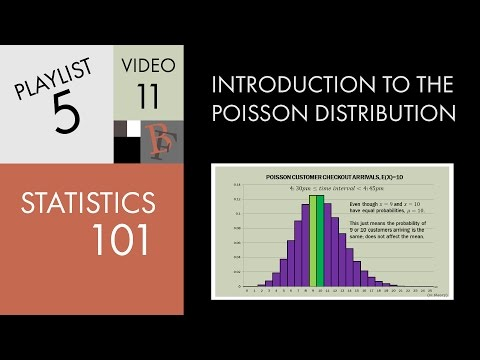

In [25]:
YouTubeVideo('8px7xuk_7OU')

Although the poisson is discrete, not continuous, using a spikey curve still makes the "curve" clear.

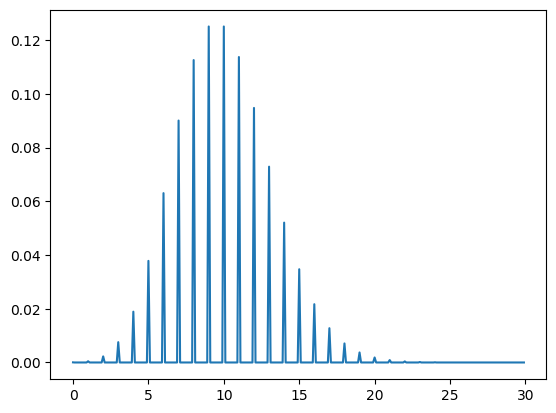

In [26]:
domain = np.arange(0,30, 0.1)
plt.plot(domain, poisson(mu=10).pmf(domain));

In [27]:
poisson(mu=10).pmf(7)

0.090079225719216

## Standard Normal Distribution

The Normal Distribution is the best known of the many statistical probability curves.  It's symmetric about the mean, and mean = mode = median.  The values taper off in a way to follows the three sigma rule shown below.

Both ```scipy.stats``` and ```np.random``` have a large vocabulary of probability curves that behave in a similar manner, but with ```scipy.stats``` given the most comprehensive set of capabilities.  

Each curve in scipy.stats, if continuous, comes with a pdf and a cdf.  Discrete curves come with a pmf and cmf.  We also get an rvs for randomly sampling from the curve in question.

What ```norm.pdf``` is giving us is the tiny probability that each of these numbers, from -4 to 4, actually occurs.  The bell shape answer is governed by a precise mathematical expression credited to Gauss.  We are simply plotting a curve of the form $y = f(x)$ where $f$ is parameterized by two additional settings: mean and standard deviation.

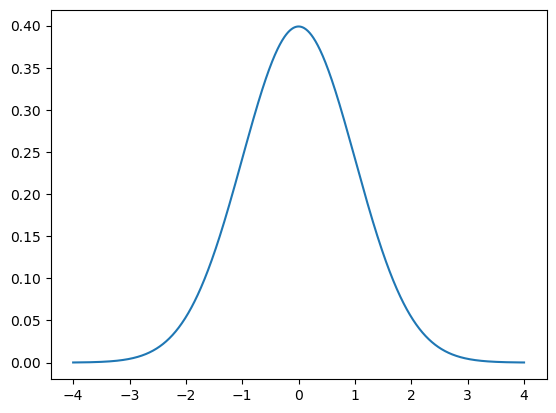

In [28]:
domain = np.linspace(-4,4,1000)  # 1000 equally spaced points between -4 and 4 inclusive
y = norm.pdf(domain, 0, 1)       # from scipy.stats
plt.plot(domain,y);              # total area under pdf == 1

We might also start with a smattering of data and find the normal curve with the best fit so far, given this particular sample.  Lets do that, starting with a sample we already trust is standard bell curved.

In [29]:
sample = rng.standard_normal(1001) # a thousand and one normalized floats
best_fit = norm.fit(sample)        # note use of fit. mean and sigma TBD.
best_fit

(-0.06151549589361088, 0.9898204926543183)

Not bad. Our miracle random number server delivered on its promise.  We should take a look:

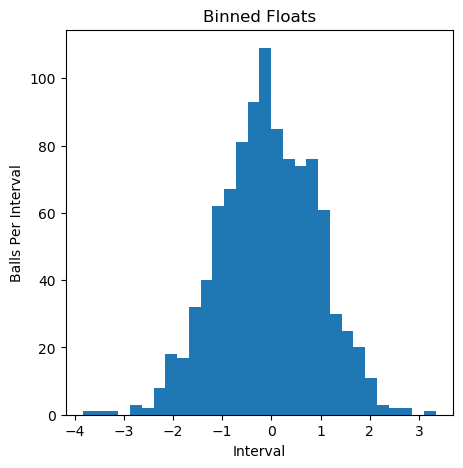

In [30]:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot('111')  # I will explain
plt.title("Binned Floats")
plt.ylabel("Balls Per Interval")
plt.xlabel("Interval")
plt.hist(sample, bins=30);

Corresponding to any probability density function (pdf) is its integral, or cumulative density function (cdf).  This gives a readout regarding the accumulated total aread under the pdf up to some value. With regard to the Standard Normal Distribution, one would expect to accumulate a probability of about 1 between -4 and 4 i.e. pretty much all the probabilities are covered by four standard deviations either way, even though in principle the curve has infinitely long tails.

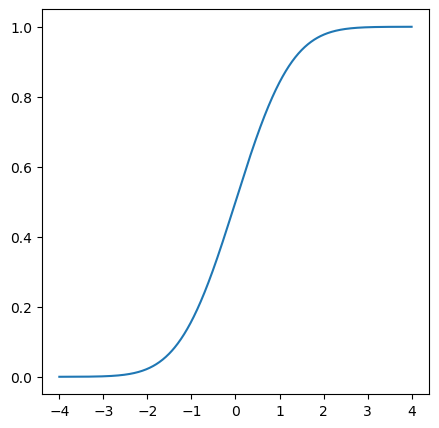

In [31]:
fig = plt.figure(figsize=(5,5))
domain = np.linspace(-4,4,1000)
ax1 = plt.subplot('111')
y = norm.cdf(domain, 0, 1) 
plt.plot(domain, y);

### Sidebar: Pascal's Pyramid

Yes, it exits and is [well-defined](http://4dsolutions.net/ocn/numeracy2.html), with 1 at the top, a triangular layer of three 1's below that, think of how many pathways to each ball, falling from the apex, the three ways to slide down to the next level.  The balls pile up in what really looks more like a bell, given it's not flat like a sheet of paper.

## IQ Data

IQ data is often used to impart normal distribution concepts, because it's designed to have specific characteristics.  The standard deviation is defined to be 15 points, meaning every 15 points away from 100 represents one standard deviation, or a z-score of 1.0.

The z-score represents a score in terms of z-units or standard deviation units.  The probability of having a z-score of 3 or above, is the same as the probability as an IQ score of 100 + 15 + 15 + 15.  

Find the cummulative probability using the ```norm.cdf``` with the actual IQ score, given you already have a normal distribution with $\mu$ = 100 and $\sigma$ = 15.

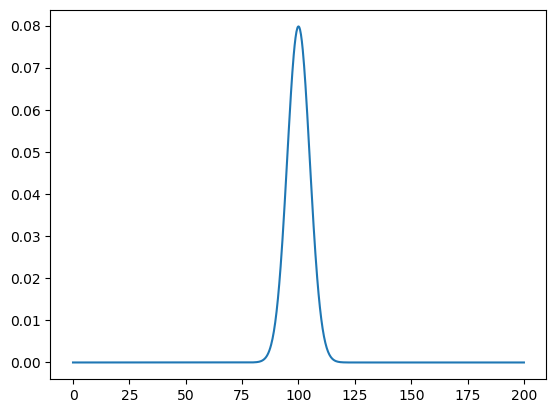

In [32]:
domain = np.linspace(0,200,1000)
y = norm.pdf(domain, 100, 5)
plt.plot(domain,y);

In [33]:
def z_score(x, mu, sigma, n=1):
    return (x - mu)/(sigma/math.sqrt(n))

z = z_score(115, 100, 5) # one standard deviation above mean
z

3.0

Lets create a standard normal distribution.  Now that we have the z-score, the probability of having an IQ of 115 or below is about 84%.

In [34]:
d = norm(0, 1) # standard normal distribution
d.cdf(z)

0.9986501019683699

In [35]:
d = norm(loc=100.0, scale=5.0) # back to the original bell curve
d.cdf(115)  # same answer as before

0.9986501019683699

The probability of having an IQ of 115 or above is simply 1 minus the previous result.

In [36]:
d = norm(loc=100.0, scale=15.0)
1 - d.cdf(115)

0.15865525393145707

In [37]:
z = z_score(93, 100, 15) # adjusted for sample size
z

-0.4666666666666667

In [38]:
d = norm(0, 1)
d.cdf(z)

0.32036919090127036

In [39]:
d = norm(100, 15)
d.cdf(93) # again, same answer

0.32036919090127036

In [40]:
z = z_score(115, 100, 15)
d = norm(0, 1)
d.cdf(z)

0.8413447460685429

In [41]:
z

1.0

In [42]:
d.ppf(0.8413447460685429)  # going backwards from cumulative population to z-score

1.0

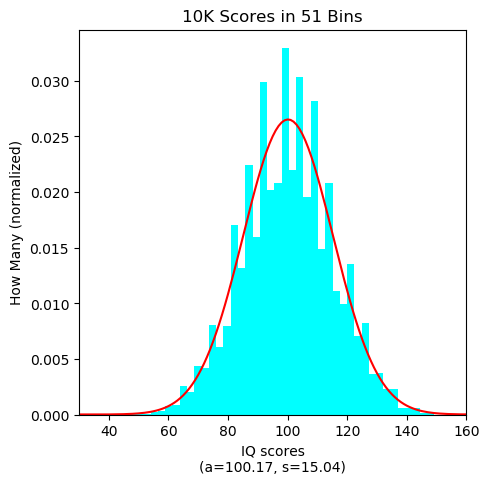

In [43]:
# ? np.random.choice
scores = range(0,201)
iqs = np.random.choice(a=scores, size=10000, p=norm.pdf(scores, 100, 15))
buckets = 50

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot('111')

xbar, std = approx = norm.fit(iqs)    # remember these were randomly selected
best_fit = norm(*approx)  # define a curve based on fitting the random sample

kwargs = {"color":"cyan"}
x, bins, p = plt.hist(iqs, bins=buckets, density=True, **kwargs)

plt.title(f"10K Scores in {len(bins)} Bins")
plt.xlabel(f"IQ scores\n(a={xbar:3.2f}, s={std:2.2f})")
plt.ylabel("How Many (normalized)")
plt.xlim(30, 160)
plt.plot(scores, best_fit.pdf(scores), color='red');

In [44]:
norm.fit(iqs)

(100.1694, 15.044949439596)

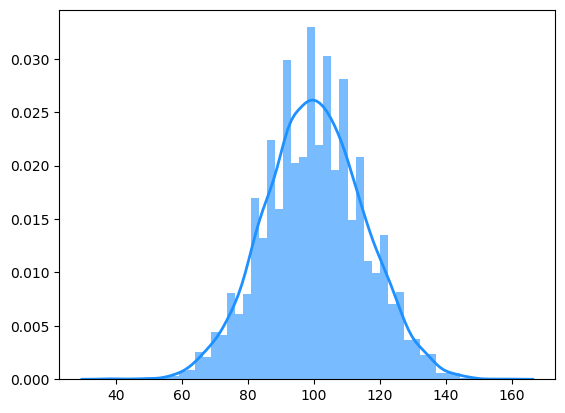

In [45]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(iqs, bins=buckets, color="dodgerblue", **kwargs);

# Three Sigma Rule

* Plus/minus 1 sigma from mean:  about 68.2% of a population
* Plus/minus 2 sigmas from mean: about 95.4% of a population
* Plus/minus 3 sigmas from mean: about 99.7% of a population

In [46]:
d = norm(100, 15)
total_area = d.cdf(100+15) - d.cdf(100-15)
print(f"{total_area:5.3f}")

0.683


In [47]:
d = norm(100, 15)
total_area = d.cdf(100+2*15) - d.cdf(100-2*15)
print(f"{total_area:5.3f}")

0.954


In [48]:
d = norm(100, 15)
total_area = d.cdf(100+3*15) - d.cdf(100-3*15)
print(f"{total_area:5.3f}")

0.997


### Shading Areas Under the Curve

In [49]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [50]:
d.cdf(115)-d.cdf(100-15)

0.6826894921370859

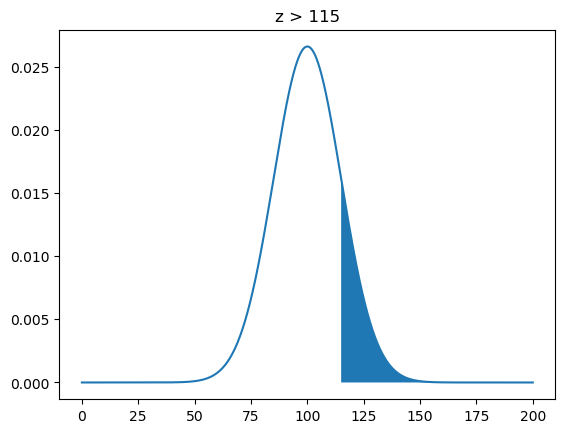

In [51]:
domain = np.arange(0, 200, 0.001)
draw_z_score(domain, domain>115, 100, 15, 'z > 115')

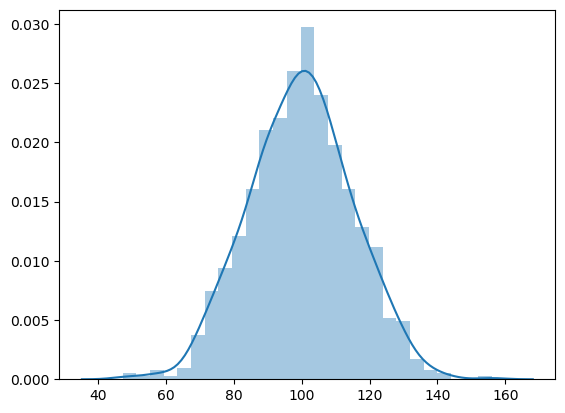

In [52]:
data = np.random.normal(loc=100, scale=15, size=1000)
sns.distplot(data, hist=True)
# plt.plot(scores, norm(100, 15).pdf(scores), color='red');
plt.show()

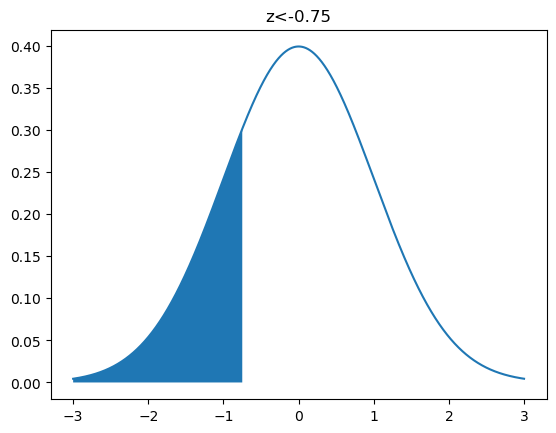

In [53]:
x = np.arange(-3,3,0.001)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

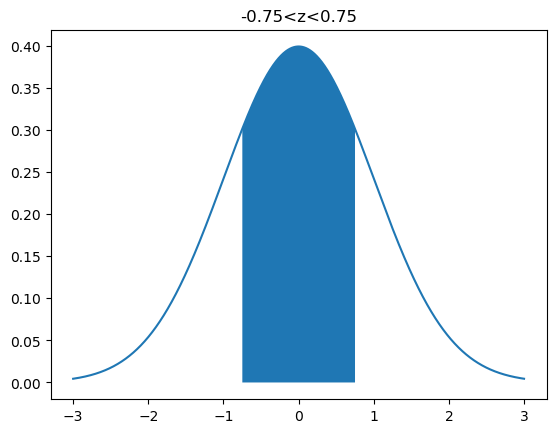

In [54]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

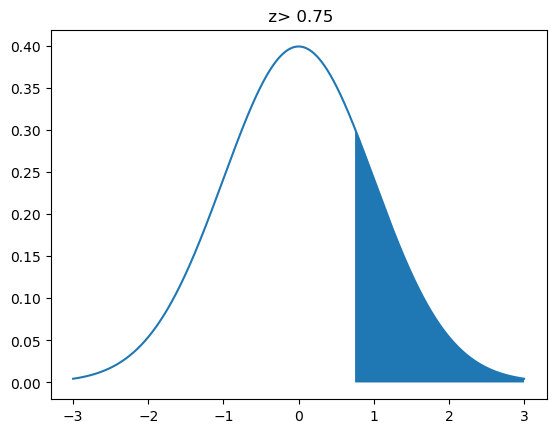

In [55]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, x > z0, 0, 1, ' z> 0.75')

![overview](http://greenteapress.com/thinkstats2/html/thinkstats2026.png)

Figure 6.2: A framework that relates representations of distribution functions.

*Think Stats* by Allen B. Downing
ISBN-13: 978-1491907337
ISBN-10: 1491907339 

[Hypothesis Testing](http://greenteapress.com/thinkstats2/html/thinkstats2010.html#sec95)
*Ibid.*

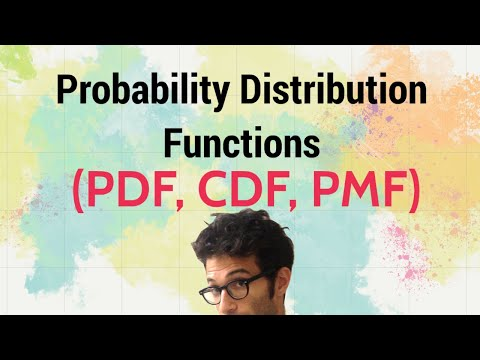

In [56]:
YouTubeVideo('YXLVjCKVP7U')

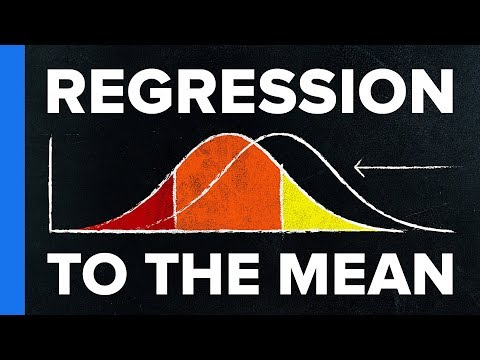

In [57]:
YouTubeVideo('1tSqSMOyNFE')